# Introduction
* In this Jupyter Notebook, we will load the train and test data and merge them. 
* After that, we will define churn and analyze customer behavior over time.

### Churn Definition
* Churn is defined as the inactivity between transactions of customers greater than 420 days (~14 months). 
* These data points are classified as churn. 
* The following image illustrates the churn definition:

![Churn Definition](../diagrams/churn_def.png)



* In the image, the x-axis represents the timeline of customer transactions
* and the y-axis represents different customers. 
* A red mark indicates a churn event, which occurs when the inactivity period between two transactions exceeds 420 days.

In [1]:
import os
os.chdir('../../')

In [2]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from global_code.util import reduce_mem_usage
import gc

/Users/marcus.silva/Code/modern-ml/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Read all the parquet files matching the pattern `./week_1/data/raw/train_*.parquet`

In [4]:
train_files = glob.glob('./week_1/data/raw/train_*.parquet')
train_df = pd.concat([pd.read_parquet(file) for file in train_files], ignore_index=True)

# Set Id as the index and drop the Id column
train_df.set_index('Id', inplace=True)

train_df.info()

max_train_date = train_df['date'].max()
min_train_date = train_df['date'].min()

print(f"Max date: {max_train_date}")
print(f"Min date: {min_train_date}")

<class 'pandas.core.frame.DataFrame'>
Index: 3926058 entries, 978127 to 462039
Data columns (total 25 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   customer_id               int64         
 1   interest_rate             float64       
 2   name                      object        
 3   country                   object        
 4   date_of_birth             object        
 5   address                   object        
 6   date                      datetime64[ns]
 7   atm_transfer_in           int64         
 8   atm_transfer_out          int64         
 9   bank_transfer_in          int64         
 10  bank_transfer_out         int64         
 11  crypto_in                 int64         
 12  crypto_out                int64         
 13  bank_transfer_in_volume   float64       
 14  bank_transfer_out_volume  float64       
 15  crypto_in_volume          float64       
 16  crypto_out_volume         float64       
 17  complaint

## Merging Dataframes

In [5]:

# Read the test.parquet file
test_df = pd.read_parquet('./week_1/data/raw/test.parquet')

# Set Id as the index and drop the Id column
test_df.set_index('Id', inplace=True)

max_test_date = test_df['date'].max()
min_test_date = test_df['date'].min()
print(f"Max test date: {max_test_date}")
print(f"Min test date: {min_test_date}")

# Merge train_df and test_df into a new dataframe called df 
df = pd.concat([train_df, test_df])
print(f"Max full dataset date: {df['date'].max()}")
print(f"Min full dataset date: {df['date'].min()}")

# Clean memory usage by setting train_df and test_df to null
train_df = None
test_df = None

# Call garbage collector
gc.collect()

Max test date: 2026-12-31 00:00:00
Min test date: 2024-01-01 00:00:00
Max full dataset date: 2026-12-31 00:00:00
Min full dataset date: 2008-01-17 00:00:00


0

In [6]:
reduce_mem_usage(df)

Memory usage of dataframe is 983.12 MB
Casting column customer_id to <class 'numpy.int32'>
Casting column interest_rate to <class 'numpy.float16'>
Casting column atm_transfer_in to <class 'numpy.int16'>
Casting column atm_transfer_out to <class 'numpy.int16'>
Casting column bank_transfer_in to <class 'numpy.int32'>
Casting column bank_transfer_out to <class 'numpy.int32'>
Casting column crypto_in to <class 'numpy.int16'>
Casting column crypto_out to <class 'numpy.int8'>
Casting column bank_transfer_in_volume to <class 'numpy.float32'>
Casting column bank_transfer_out_volume to <class 'numpy.float32'>
Casting column crypto_in_volume to <class 'numpy.float16'>
Casting column crypto_out_volume to <class 'numpy.float16'>
Casting column complaints to <class 'numpy.int8'>
Casting column tenure to <class 'numpy.int16'>
Memory usage after optimization is: 599.95 MB
Decreased by 39.0%


,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,bank_transfer_in,...,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud,Usage
Id,,,,,,,,,,,,,,,,,,,,,
978127,1,0.0,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2014-07-25,0,0,531,...,26.328125,0,[],"{'appointment': None, 'email': None, 'phone': ...",2381,False,Amenity horticulturist,False,False,NaN
978762,1,0.0,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2014-07-26,0,0,487,...,24.031250,0,[],"{'appointment': None, 'email': None, 'phone': ...",2382,False,Amenity horticulturist,False,False,NaN
979413,1,0.0,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2014-07-27,0,0,438,...,24.468750,0,[],"{'appointment': None, 'email': None, 'phone': ...",2383,False,Amenity horticulturist,False,False,NaN
980060,1,0.0,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2014-07-28,0,0,408,...,24.281250,0,[],"{'appointment': None, 'email': None, 'phone': ...",2384,False,Amenity horticulturist,False,False,NaN
996550,5,0.0,Emily Solis,Netherlands,2006-06-30,"664 Brown Rapid\nBrianburgh, MN 10337 Netherlands",2014-08-22,0,0,2,...,26.687500,0,[],"{'appointment': None, 'email': None, 'phone': ...",2409,False,Occupational hygienist,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7547787,47228,0.0,Tammy Sanchez,Germany,1988-10-13,"2035 John Forks Suite 685\nThompsonport, FL 96...",2026-12-31,0,0,2880,...,97.250000,0,[],"{'appointment': None, 'email': None, 'phone': ...",791,False,"Education officer, community",False,False,Public
7547788,26232,2.5,Deborah Booth,Belgium,1961-01-16,"837 Sanchez Village Apt. 410\nLake Rebecca, TX...",2026-12-31,0,0,12,...,29.718750,0,[],"{'appointment': None, 'email': None, 'phone': ...",2329,False,"Therapist, sports",False,False,Public
7547789,39233,2.5,Erin Dudley,Denmark,2000-07-03,"627 Reese Heights Apt. 485\nPort Tamaraview, O...",2026-12-31,0,0,4312,...,94.875000,0,[],"{'appointment': None, 'email': None, 'phone': ...",1550,False,unemployed,False,False,Public


In [7]:
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024 ** 2:.2f} MB")

Memory usage: 3867.93 MB


## Define Churn Variable

In [33]:
#max_dataset_date = '2022-10-01'
#train_df = df[df.date < '2022-10-01']
#max_dataset_date = pd.Da'2022-10-0'
max_inactivity = 420
df['churn'] = 0
df = df.sort_values(['customer_id', 'date'], ascending=True)
df['next_date'] = df.groupby('customer_id')['date'].shift(-1)
df['next_date'].fillna(df.date.max(), inplace=True)
df['days_diff'] = (df['next_date'] - df['date']).dt.days
df.loc[df['days_diff'] >= max_inactivity, 'churn'] = 1

train_df = df.loc[df['date'] < '2022-10-01', :]

# churn on the full dataset period
print('Churn ratio full dataset')
print(df.churn.value_counts())
print(df.churn.value_counts(normalize=True))
print()
print('Churn ratio train dataset')
print(train_df.churn.value_counts())
print(train_df.churn.value_counts(normalize=True))

/var/folders/02/kk2lyyc1509_l0ltgwm_19y40000gq/T/ipykernel_70178/3753949439.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['next_date'].fillna(df.date.max(), inplace=True)


Churn ratio full dataset
churn
0    5219279
1      67251
Name: count, dtype: int64
churn
0    0.987279
1    0.012721
Name: proportion, dtype: float64

Churn ratio train dataset
churn
0    3397389
1      23481
Name: count, dtype: int64
churn
0    0.993136
1    0.006864
Name: proportion, dtype: float64


In [34]:
gp = train_df.groupby('customer_id')['date'].count().reset_index()
customers_with_one_transaction = list(gp[gp['date'] == 1]['customer_id'])

# Checking the next date missing for customers with only one transaction
train_df.loc[train_df['customer_id'].isin(customers_with_one_transaction), 'next_date'].isna().sum()

0

In [35]:
train_df.loc[train_df['customer_id'].isin(customers_with_one_transaction), ['date', 'next_date', 'days_diff']]

,date,next_date,days_diff
Id,,,
32054,2008-08-19,2025-01-30,6008
107816,2009-08-25,2024-08-03,5457
170305,2010-03-29,2024-02-20,5076
197550,2010-06-09,2024-01-20,4973
202051,2010-06-20,2026-08-29,5914
...,...,...,...
3762496,2022-09-30,2022-10-02,2
3762497,2022-09-30,2022-10-01,1
3762498,2022-09-30,2022-10-01,1


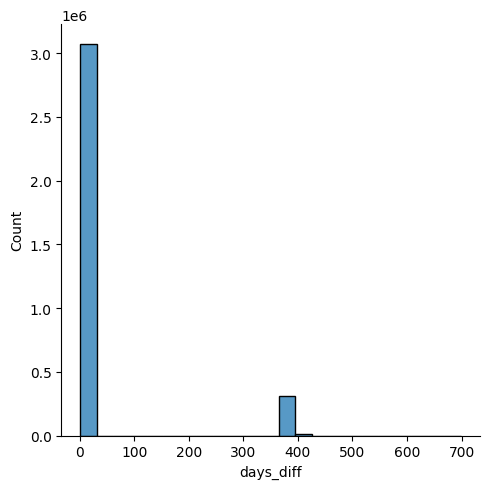

In [26]:
sns.displot(train_df.loc[train_df.days_diff < 700,'days_diff'], kde=False)

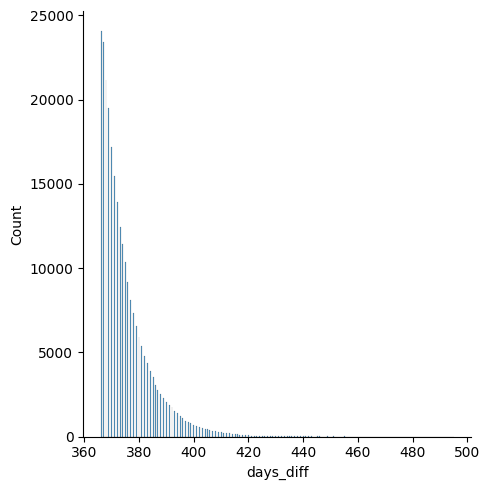

In [33]:
sns.displot(train_df.loc[(train_df.days_diff > 10),'days_diff'], kde=False)

<Axes: xlabel='days_diff', ylabel='Proportion'>

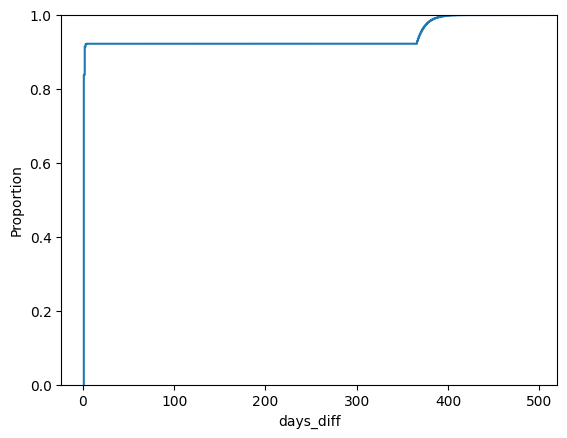

In [34]:
sns.ecdfplot(train_df['days_diff'])

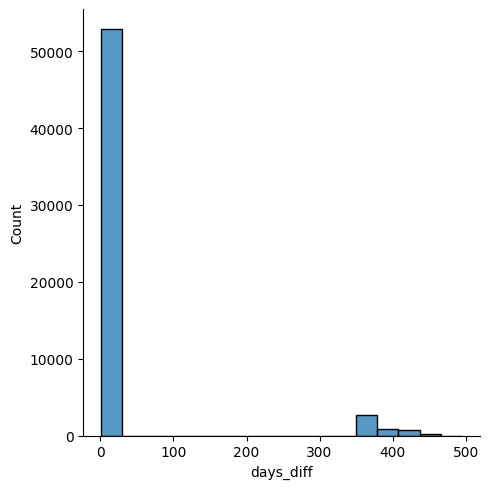

In [35]:
customers_with_big_inactivity = train_df.loc[train_df.days_diff >= 420, 'customer_id'].unique()
sns.displot(train_df.loc[train_df.customer_id.isin(customers_with_big_inactivity), 'days_diff']) 

## Data Split
* In this section, we define the split strategy for our dataset. 
* The dataset is divided into three periods: train, validation, and test. 
* The train period includes data up to october 2021. 
* The validation period spans from october 1, 2021, to october 1, 2022. 
* The test period starts from January 1, 2024, onwards.

The following image illustrates the dataset split strategy:

![Dataset Split Strategy](../diagrams/churn_def.png)



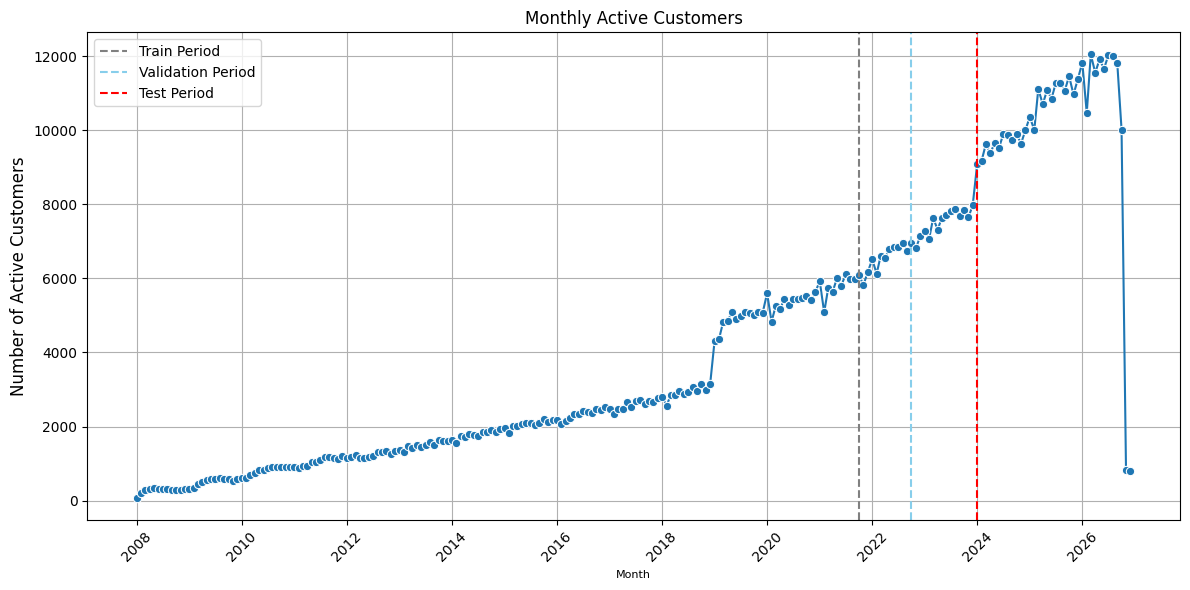

In [36]:
# Count unique active monthly customers
df['date_trunc_month'] = df['date'].dt.to_period('M').dt.to_timestamp()
monthly_active_customers = df.groupby(df['date_trunc_month'])['customer_id'].nunique().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_active_customers, x='date_trunc_month', y='customer_id', marker='o')

plt.axvline(pd.Timestamp('2021-10-01'), color='gray', linestyle='--', label='Train Period')
plt.axvline(pd.Timestamp('2022-10-01'), color='skyblue', linestyle='--', label='Validation Period')
plt.axvline(pd.Timestamp('2024-01-01'), color='red', linestyle='--', label='Test Period')
plt.legend()

# Beautify the plot
plt.title('Monthly Active Customers', fontsize=12)
plt.xlabel('Month', fontsize=8)
plt.ylabel('Number of Active Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
df.to_parquet('./week_1/data/processed/full_dataset.parquet')